In [1]:
#MURA dataset is located in my googe drive, can also mount from file system
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
import math

In [5]:
#import test and valid csv's from google drive
train = pd.read_csv('/content/drive/MyDrive/MURA-v1.1/train_labeled_studies.csv', header = None, names = ['image_path', 'target'])
test = pd.read_csv('/content/drive/MyDrive/MURA-v1.1/valid_labeled_studies.csv', header = None, names = ['image_path', 'target'])

In [6]:
train.head()

,image_path,target
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [7]:
test.head()

,image_path,target
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1


In [8]:
print(f'train:{train.shape}\ntest:{test.shape}')

train:(13457, 2)
test:(1199, 2)


In [9]:
#helper funtion to extract info from train and test dataframes
def clean_df(df):
  temp = df['image_path'].str.split('/', expand=True)
  new_df = pd.DataFrame(df['image_path'])
  new_df['study'] = temp[4].str.split('_', expand = True)[0].str[-1:]
  new_df['study_type'] = temp[4].str.split('_', expand = True)[1]
  new_df['region'] = temp[2].str.split('_', expand = True)[1]
  new_df['target'] = df['target']

  return new_df

In [10]:
train = clean_df(train)
test = clean_df(test)

In [11]:
train.head()

,image_path,study,study_type,region,target
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,positive,SHOULDER,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,positive,SHOULDER,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1,positive,SHOULDER,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1,positive,SHOULDER,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1,positive,SHOULDER,1


In [12]:
test.head()

,image_path,study,study_type,region,target
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,positive,WRIST,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,positive,WRIST,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,2,positive,WRIST,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,3,positive,WRIST,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,positive,WRIST,1


In [13]:
all_data = train.append(test)

In [14]:
print(f'train:{train.shape}\ntest:{test.shape}\nall_data:{all_data.shape}')

train:(13457, 5)
test:(1199, 5)
all_data:(14656, 5)


In [15]:
# gets unique values of relevant rows
def get_unique(df):
  print(df['study'].unique())
  print(df['study_type'].unique())
  print(df['region'].unique())

In [16]:
get_unique(test)
get_unique(train)

['1' '2' '3' '4']
['positive' 'negative']
['WRIST' 'FOREARM' 'HAND' 'HUMERUS' 'SHOULDER' 'ELBOW' 'FINGER']
['1' '2' '3' '4']
['positive' 'negative']
['SHOULDER' 'HUMERUS' 'FINGER' 'ELBOW' 'WRIST' 'FOREARM' 'HAND']


In [53]:
# patient count by study with visulization
def study_count(df):
  stud_df = df.groupby('study').count()['image_path'].reset_index()
  stud_df.columns = ['Study','Count']
  display(stud_df)

  fig, ax = plt.subplots(figsize = (8,8))

  ax.bar(stud_df['Study'], stud_df['Count'], color = '#C8DDE7')
  container = ax.containers[0]
  ax.bar_label(container, labels = [' ' + f'{x:,.0f}' for x in container.datavalues], style = 'italic', fontsize = 12)
  ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
  ax.set_xlabel('Studies', fontsize = 14, weight = 'bold')
  ax.set_ylabel('Image Count', fontsize = 14, weight = 'bold')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(True)
  ax.spines['bottom'].set_visible(False)
  plt.tick_params(left = False, bottom = False)
  plt.title('Image Count by Study Amount', fontsize = 14, weight = 'bold')
  tot = stud_df['Count'].sum()
  plt.ylim(0,math.ceil(tot)*1.05)
  plt.show()
  return 

,Study,Count
0,1,12934
1,2,480
2,3,35
3,4,8


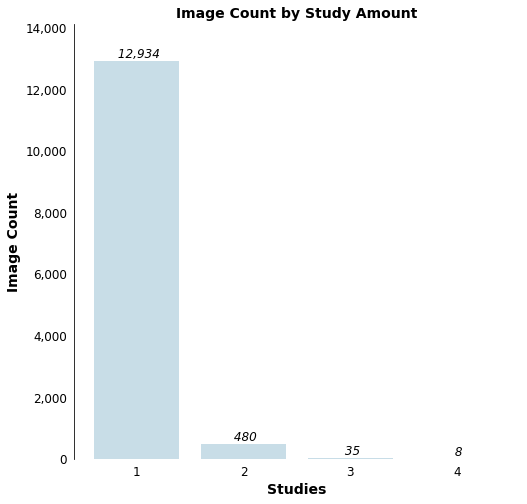

In [56]:
study_count(train)

,Study,Count
0,1,12934
1,2,480
2,3,35
3,4,8


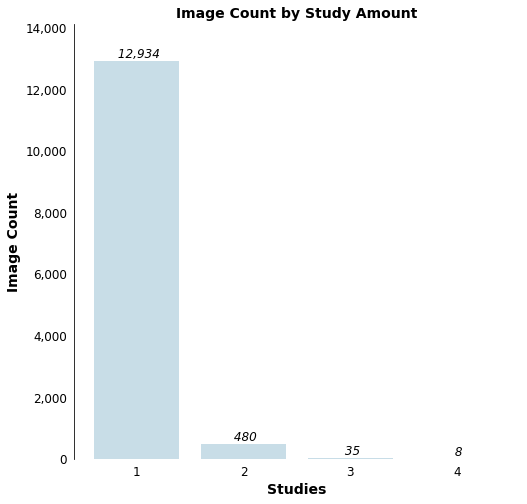

In [57]:
study_count(train)

In [69]:
# patient count by study type with visulization
def study_type_count(df):
  styp_df = df.groupby('study_type').count()['image_path'].reset_index()
  styp_df.columns = ['Study Type','Count']
  display(styp_df)

  fig, ax = plt.subplots(figsize = (8,8))

  ax.bar(styp_df['Study Type'], styp_df['Count'], color = '#0097a7')
  container = ax.containers[0]
  ax.bar_label(container, labels = [' ' + f'{x:,.0f}' for x in container.datavalues], style = 'italic', fontsize = 12)
  ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
  ax.set_xlabel('Study Type', fontsize = 14, weight = 'bold')
  ax.set_ylabel('Image Count', fontsize = 14, weight = 'bold')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(True)
  ax.spines['bottom'].set_visible(False)
  tot = styp_df['Count'].sum()
  plt.ylim(0,math.ceil(tot)*.8)
  plt.tick_params(left = False, bottom = False)
  plt.title('Image Count by Study Type', fontsize = 14, weight = 'bold')
  plt.show()
  return

,Study Type,Count
0,negative,8280
1,positive,5177


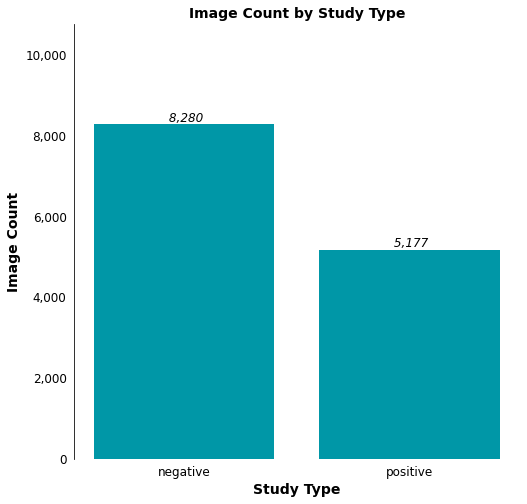

In [72]:
study_type_count(train)

,Study Type,Count
0,negative,661
1,positive,538


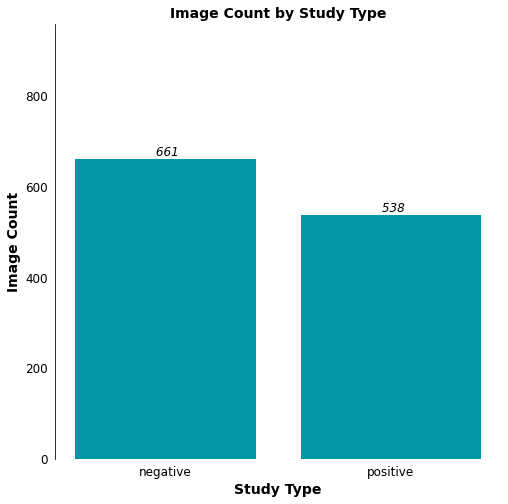

In [73]:
study_type_count(test)

In [86]:
#region count and visualisation
def region_count(df):
  # patient count by body part
  bdpt_df = df.groupby('region').count()['image_path'].reset_index()
  bdpt_df.columns = ['Region','Count']
  display(bdpt_df)

  # patient count by body part bargraph
  fig, ax = plt.subplots(figsize = (8,8))

  ax.barh(bdpt_df['Region'], bdpt_df['Count'], color = '#A8D3E3')
  container = ax.containers[0]
  ax.bar_label(container, labels = [' ' + f'{x:,.0f}' for x in container.datavalues], style = 'italic', fontsize = 12)
  plt.tick_params(left = False, bottom = False)
  ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
  ax.set_xlabel('Image Count', fontsize = 14, weight = 'bold')
  ax.set_ylabel('Region', fontsize = 14, weight = 'bold')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(True)
  ax.spines['bottom'].set_visible(False)
  plt.title('Image Count by Region', fontsize = 14, weight = 'bold')
  plt.show()
  return

,Region,Count
0,ELBOW,1754
1,FINGER,1935
2,FOREARM,877
3,HAND,2018
4,HUMERUS,592
5,SHOULDER,2821
6,WRIST,3460


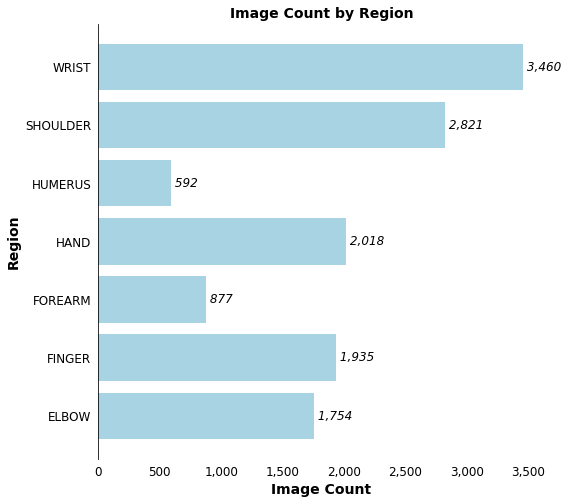

In [87]:
region_count(train)

,Region,Count
0,ELBOW,158
1,FINGER,175
2,FOREARM,133
3,HAND,167
4,HUMERUS,135
5,SHOULDER,194
6,WRIST,237


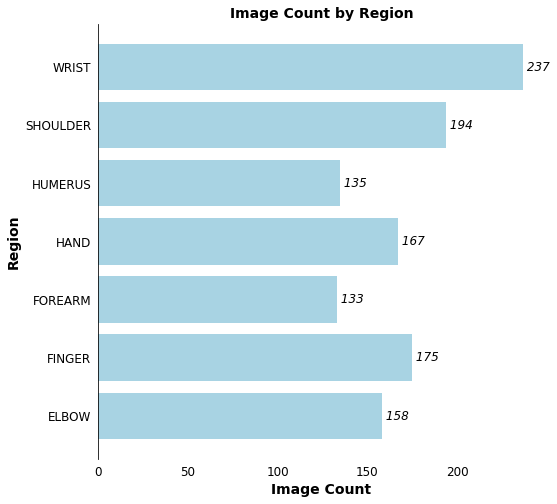

In [88]:
region_count(test)

In [116]:
# patient count by study type and region with visulization
def type_region(df):  
  stack = df.groupby(['region', 'study_type']).count()['image_path'].reset_index()
  stack.columns = ['Region','Study Type','Count']
  stack_neg = stack[stack['Study Type'] == 'negative']
  stack_pos = stack[stack['Study Type'] == 'positive']
  stack_all = stack_pos.merge(stack_neg, on = 'Region', how = 'left')
  stack_all['Count_z'] = stack_all['Count_x'] + stack_all['Count_y']
  display(stack_all)

  # patient count by study type and region stacked bargraph
  fig, ax = plt.subplots(figsize = (8,8))

  x = stack_all['Region']
  y1 = stack_all['Count_x']
  y2 = stack_all['Count_y']
  y3 = stack_all['Count_z']
  
  ax.barh(x, y1, color = '#A8D3E3', label = 'Positive Detection')
  ax.barh(x, y2, left = y1, color = '#0097a7', label = 'Negative Detection')
  container = ax.containers[0]
  container2 = ax.containers[1]
  ax.bar_label(container, labels = [' ' + f'{x:,.0f}' for x in container.datavalues], style = 'italic', fontsize = 12, label_type = 'center')
  ax.bar_label(container2, labels = [' ' + f'{x:,.0f}' for x in container2.datavalues], style = 'italic', fontsize = 12, label_type = 'center')
  ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
  ax.set_xlabel('Image Count', fontsize = 14, weight = 'bold')
  ax.set_ylabel('Region', fontsize = 14, weight = 'bold')
  ax.set_yticks(x, rotation = 90)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(True)
  ax.spines['bottom'].set_visible(False)
  plt.tick_params(left = False, bottom = False)
  plt.title('Image Count by Study Type and Region', fontsize = 14, weight = 'bold')
  ax.legend()

  plt.show()
  return

,Region,Study Type_x,Count_x,Study Type_y,Count_y,Count_z
0,ELBOW,positive,660,negative,1094,1754
1,FINGER,positive,655,negative,1280,1935
2,FOREARM,positive,287,negative,590,877
3,HAND,positive,521,negative,1497,2018
4,HUMERUS,positive,271,negative,321,592
5,SHOULDER,positive,1457,negative,1364,2821
6,WRIST,positive,1326,negative,2134,3460


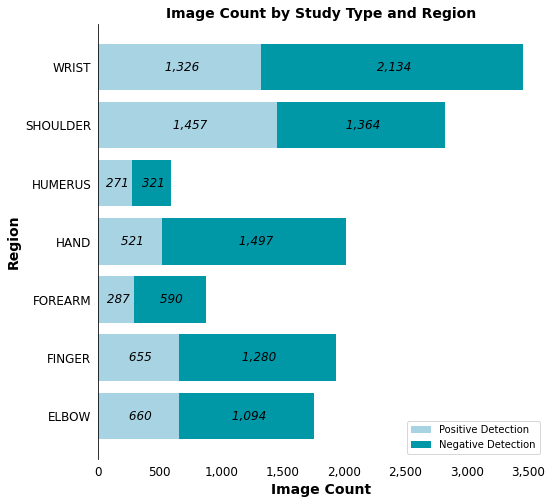

In [117]:
type_region(train)

,Region,Study Type_x,Count_x,Study Type_y,Count_y,Count_z
0,ELBOW,positive,66,negative,92,158
1,FINGER,positive,83,negative,92,175
2,FOREARM,positive,64,negative,69,133
3,HAND,positive,66,negative,101,167
4,HUMERUS,positive,67,negative,68,135
5,SHOULDER,positive,95,negative,99,194
6,WRIST,positive,97,negative,140,237


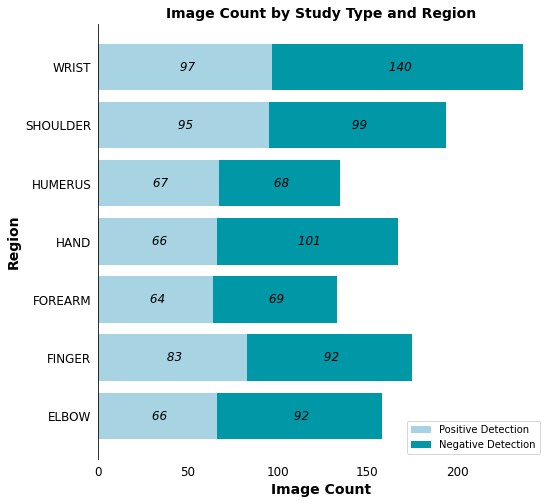

In [118]:
type_region(test)